# Bank Marketing Campaign Analysis And Prediction #


### **Business Understanding**

#### **Project Overview**  
Azubi Bank is planning to launch a targeted marketing campaign to promote its term deposit products. To maximize the campaign's success and optimize resource allocation, the bank aims to predict which customers are most likely to subscribe to a term deposit. By understanding the factors influencing customer decisions and leveraging predictive modeling, Azubi Bank can focus its efforts on the right customers, improving conversion rates and reducing costs.

#### **Objective**  
The primary goal of this project is to analyze historical marketing campaign data to:  
1. Identify key factors that influence customer subscription to term deposits.  
2. Build a robust machine learning model capable of predicting whether a customer will subscribe to a term deposit.  

This predictive model will serve as a decision-making tool for Azubi Bank's marketing team, helping them design more effective and personalized campaigns.


#### **Approach and Key Steps**  

1. **Data Understanding and Preprocessing**:  
   - Analyze the structure and quality of the dataset, identifying any missing values, inconsistencies, or irrelevant features.  
   - Clean the data, encode categorical variables, and normalize numerical features.  

2. **Exploratory Data Analysis (EDA)**:  
   - Perform statistical analysis and visualizations to uncover trends, patterns, and correlations.  
   - Identify demographic, behavioral, and campaign-related factors that influence customer subscription.  

3. **Feature Selection and Engineering**:  
   - Select the most relevant features to ensure model interpretability and efficiency.  
   - Create new features or transformations if necessary to enhance model performance.

4. **Model Training and Evaluation**:  
   - Train multiple machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting) using the training dataset.  
   - Evaluate models using appropriate metrics such as precision, recall, F1-score, and ROC-AUC to identify the best-performing model.  

5. **Business Insights and Recommendations**:  
   - Translate findings from the analysis into actionable business insights.  
   - Highlight the key factors that influence customer decisions and recommend strategies for improving future marketing campaigns.  

6. **Model Deployment**:  
   - Deploy the predictive model as an interactive tool (e.g., a Streamlit app) for real-time predictions during the campaign.

#### **Impact and Value**  
This project will empower Azubi Bank to:  
- Make data-driven decisions, improving the efficiency and effectiveness of marketing campaigns.  
- Identify and focus on high-potential customers, reducing costs and increasing revenue.  
- Understand customer behavior and preferences, allowing for personalized marketing strategies.  

By leveraging advanced data analytics and machine learning, Azubi Bank can position itself as a leader in customer-centric banking while achieving its business objectives.  

## Data Understanding ##
  - Below is a description of the column names
   - These columns help understand how client demographics, contact strategies, past interactions, and economic conditions influence the likelihood of subscription.

A.        **Client Features[demographics and personal details]**
These columns describe the client , which help identify patterns in customer behavior:

  - **Age**: Age of the client.
- Relevance: Older or younger age groups might show different subscription trends.
 - **Job:** Type of job (e.g., admin., services, technician).

Relevance: Job type can indicate financial stability or suitability for the term deposit.
  - **marital:** Marital status (e.g., single, married, divorced).
Relevance: Financial decision-making may vary by marital status.

**Education:** Education level (e.g., basic, high school, university).
Relevance: Higher education levels might correlate with better financial planning.

  - **Default:** Whether the client has credit in default (yes or no).
Relevance: A client with a history of default may be less likely to subscribe.

  - **Housing** Whether the client has a housing loan (yes or no).
Relevance: Clients with housing loans might have limited capacity for additional investments.

  - **loan:** Whether the client has a personal loan (yes or no).
Relevance: Similar to housing, it indicates financial commitments.

B.         **Contact Features**
These columns describe how the client was contacted and when, which could impact the likelihood of subscription:

  - **Contact** : Type of communication (e.g., cellular, telephone).: Some contact methods might be more effective than others.
  - **Month** : Last contact month (e.g., May, October).; To check Seasonal trends might influence subscription rates

  - **day_of_week**: Day of the week the client was contacted (e.g., Monday, Friday).

  - **campaign:**  Number of contacts performed during this campaign; Over-contacting might reduce subscription likelihood.

C.       **Previous Campaign Features** ; These columns reflect the client’s interaction history with the bank:

**pdays:** Days since the client was last contacted (999 means never contacted before).
Relevance: Recency of contact could impact decision-making.

**Previous:** Number of contacts performed before this campaign.;Past interactions may indicate client interest or fatigue.

**poutcome:** Outcome of the previous marketing campaign (e.g., success, nonexistent).; A previous success may predict a higher chance of subscription.

  **Economic Features** ; These columns provide insights into the economic environment at the time of the campaign:

  - **emp.var.rate:** Employment variation rate (indicator of labor market conditions).
Relevance: A good economy might increase the likelihood of term deposit subscriptions.
  - **cons.price.idx:**  Consumer price index (measure of inflation); Indicates economic stability.
  - **cons.conf.idx:**  Consumer confidence index (economic sentiment); Reflects clients’ willingness to make financial decisions.
  - **euribor3m:** Euribor 3-month rate (benchmark interest rate). Higher rates might make deposits more attractive.
  - **nr.employed:** Number of employees (employment market indicator).; A high employment rate might correlate with higher subscriptions.

D.        **Target Variable** 
  - **y:** Target variable indicating whether the client subscribed to a term deposit (yes or no).
Relevance: This is the variable the model will predict based on the other features.

 ### Data Collection And Preparation

In [2]:
# Importing Libraries 
# Data Manipulation And Analysis
import pandas as pd
import numpy as np
import pyodbc

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,mutual_info_classif
import re
import openpyxl
import calendar
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

### Data Exploration

In [3]:
## Uploading Data.
training_data = pd.read_csv('C:/Users/Josephine/Desktop/Career Accelerator/Bank-Marketing-Campaign-Analysis-And-Prediction/myvirtual-env/Datasets/bank-additional-full.csv', sep=';')
training_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset Shape: {training_data.shape}")

Dataset Shape: (41188, 21)


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Display unique values for categorical columns
for col in training_data.select_dtypes(include='object').columns:
    print(f"{col}: {training_data[col].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [7]:
training_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
training_data.isnull().sum()
# There are no null values in training dataset. 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
training_data.duplicated().sum()

np.int64(12)

### handing missing values

In [10]:
# Drop duplicates if necessary
training_data = training_data.drop_duplicates()

In [11]:
# Drop 'duration' column as it might cause data leakage
training_data = training_data.drop(columns=['duration'])

In [12]:
# Define a mapping for the new education groups
education_mapping = {
    'basic.4y': 'basic school',
    'basic.6y': 'basic school',
    'basic.9y': 'basic school',
    'high.school': 'high school',
    'professional.course': 'professional course',
    'university.degree': 'university degree',
    'illiterate': 'illiterate',
    'unknown': 'unknown'
}

# Apply the mapping to the 'education' column
training_data['education'] = training_data['education'].map(education_mapping)

# Verify the new grouping
print(training_data['education'].value_counts())


education
basic school           12512
university degree      12164
high school             9512
professional course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64


In [13]:
training_data['education']

0               basic school
1                high school
2                high school
3               basic school
4                high school
                ...         
41183    professional course
41184    professional course
41185      university degree
41186    professional course
41187    professional course
Name: education, Length: 41176, dtype: object

### Exploratory Data Analysis.
- We will also answer some business questions about our findings.

In [14]:
# Finding the value counts in the y colunm
value_counts= training_data["y"].value_counts()
value_counts

y
no     36537
yes     4639
Name: count, dtype: int64

In [15]:
# Finding the perentage suscription
percentages = value_counts /value_counts.sum() * 100
percentages

y
no     88.733728
yes    11.266272
Name: count, dtype: float64

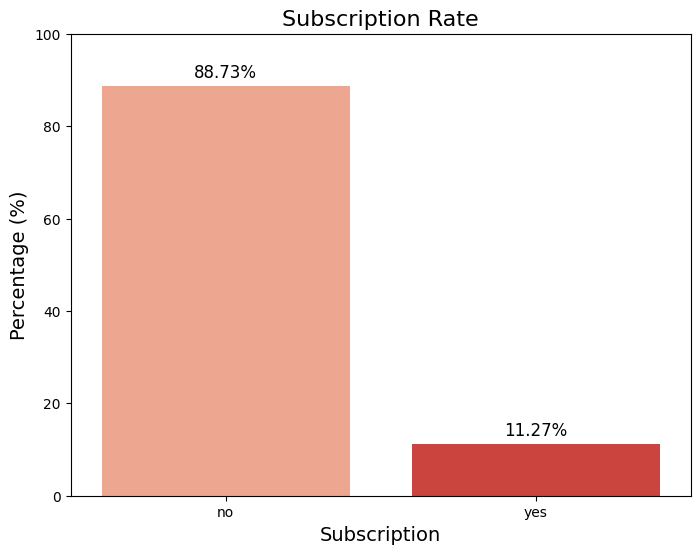

In [16]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=percentages.index, y=percentages.values, palette='Reds')

# Adding titles and labels
plt.title('Subscription Rate', fontsize=16)
plt.xlabel('Subscription', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)

# Displaying the percentage values on top of the bars
for i, percentage in enumerate(percentages.values):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

There is a huge difference in the subscription(y) rate making the data unbalanced.

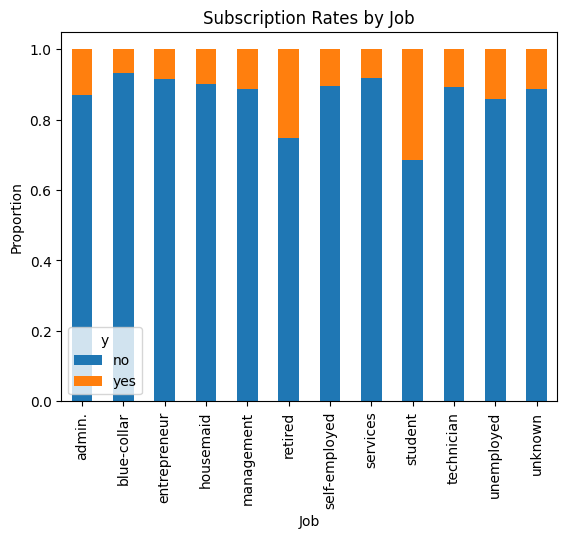

In [17]:
training_data.groupby('job')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Subscription Rates by Job')
plt.ylabel('Proportion')
plt.xlabel('Job')
plt.show()


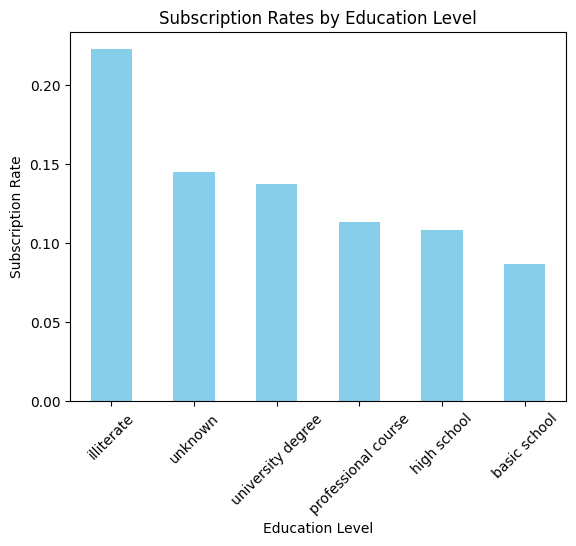

In [18]:
# Group by education and calculate subscription rates
education_subscription = training_data.groupby('education')['y'].value_counts(normalize=True).unstack()

# Plot the subscription rates by education
education_subscription['yes'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Subscription Rates by Education Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()


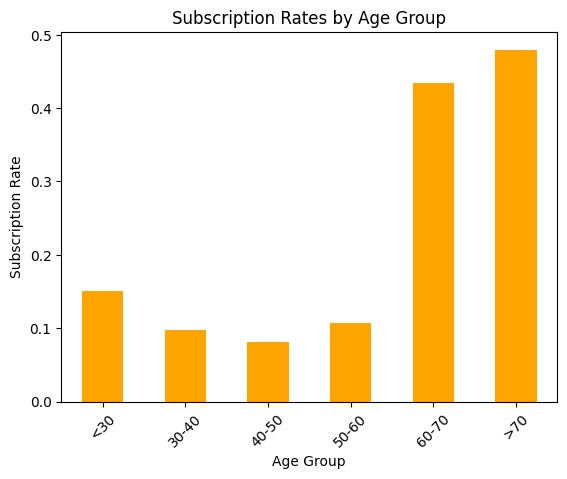

In [19]:
# Create age bins
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '>70']
training_data['age_group'] = pd.cut(training_data['age'], bins=bins, labels=labels)

# Group by age group and calculate subscription rates
age_subscription = training_data.groupby('age_group')['y'].value_counts(normalize=True).unstack()

# Plot the subscription rates by age group
age_subscription['yes'].plot(kind='bar', color='orange')
plt.title('Subscription Rates by Age Group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


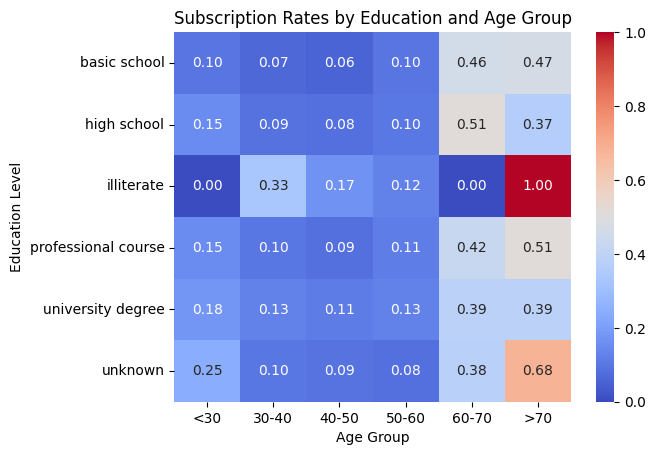

In [20]:
# Group by education and age group to calculate subscription rates
edu_age_subscription = training_data.groupby(['education', 'age_group'])['y'].value_counts(normalize=True).unstack()

# Pivot for visualization
edu_age_pivot = edu_age_subscription['yes'].unstack()

# Heatmap of subscription rates by education and age group
sns.heatmap(edu_age_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Subscription Rates by Education and Age Group')
plt.ylabel('Education Level')
plt.xlabel('Age Group')
plt.show()


Points from the heatmap are;
1. **High Subscription Rates in Older Age Groups with Certain Education Levels:**
   - Individuals aged `>70` with "illiterate" or "unknown" education levels have the highest subscription rates, suggesting niche targeting potential for this demographic.

2. **University Graduates Consistently Show Better Engagement Across Ages:**
   - University-educated customers have higher subscription rates, especially in younger (`<30`) and middle-aged (`50-60`) groups, indicating this is a responsive segment.

3. **Basic Education Leads to Low Engagement Across Most Age Groups:**
   - Subscription rates for those with "basic" education remain low across age groups, except for `>60`, showing limited interest overall.

4. **Professional Course Learners Are Strong Mid-Level Performers:**
   - Individuals with "professional courses" exhibit moderate and consistent subscription rates, particularly for ages `60-70`.

5. **Age Groups <30 Show Most Potential Across Education Levels:**
   - Across almost all education categories, the `<30` age group demonstrates relatively higher engagement, emphasizing their importance as a key target demographic.

Would you like to adjust the visualizations further or focus on another demographic factor?

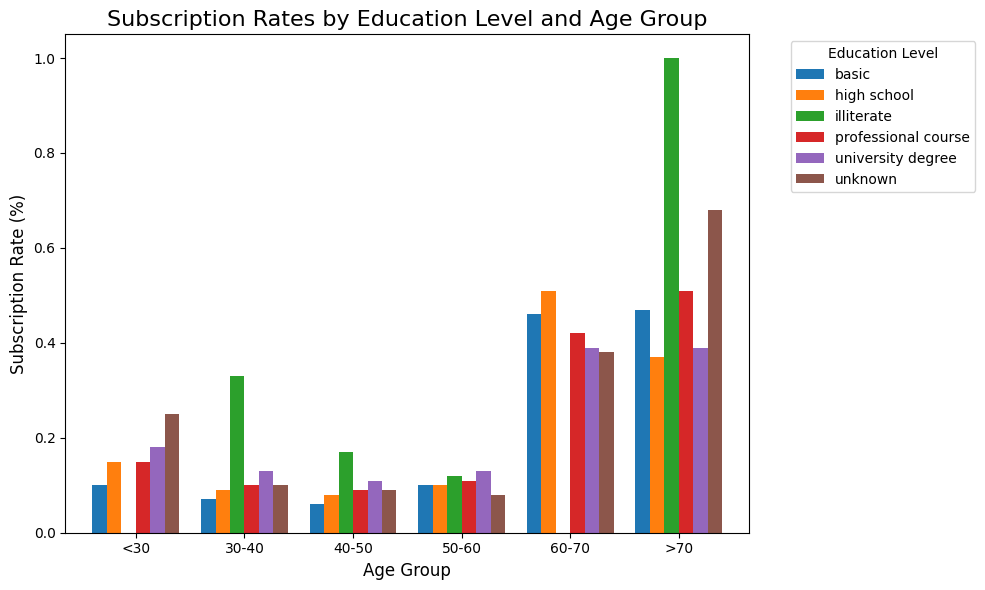

In [21]:
# Sample DataFrame for demonstration (replace with your actual data)
data = {
    '<30': [0.10, 0.15, 0.00, 0.15, 0.18, 0.25],
    '30-40': [0.07, 0.09, 0.33, 0.10, 0.13, 0.10],
    '40-50': [0.06, 0.08, 0.17, 0.09, 0.11, 0.09],
    '50-60': [0.10, 0.10, 0.12, 0.11, 0.13, 0.08],
    '60-70': [0.46, 0.51, 0.00, 0.42, 0.39, 0.38],
    '>70': [0.47, 0.37, 1.00, 0.51, 0.39, 0.68]
}
education_levels = ['basic', 'high school', 'illiterate', 'professional course', 'university degree', 'unknown']

# Convert data to DataFrame
df = pd.DataFrame(data, index=education_levels)

# Create a bar plot
df.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Subscription Rates by Education Level and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


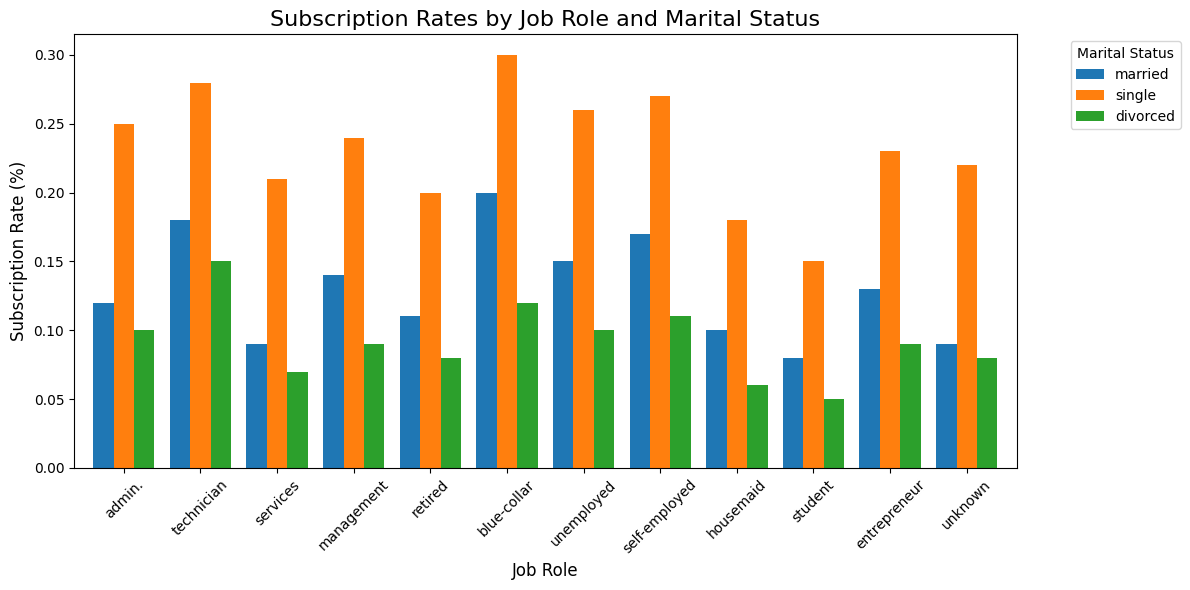

In [22]:
# Example aggregated data (replace with actual groupby results from your dataset)
data = {
    'married': [0.12, 0.18, 0.09, 0.14, 0.11, 0.20, 0.15, 0.17, 0.10, 0.08, 0.13, 0.09],
    'single': [0.25, 0.28, 0.21, 0.24, 0.20, 0.30, 0.26, 0.27, 0.18, 0.15, 0.23, 0.22],
    'divorced': [0.10, 0.15, 0.07, 0.09, 0.08, 0.12, 0.10, 0.11, 0.06, 0.05, 0.09, 0.08]
}
job_roles = ['admin.', 'technician', 'services', 'management', 'retired', 
             'blue-collar', 'unemployed', 'self-employed', 'housemaid', 
             'student', 'entrepreneur', 'unknown']

# Create a DataFrame
df = pd.DataFrame(data, index=job_roles)

# Create a clustered bar chart
df.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the plot
plt.title('Subscription Rates by Job Role and Marital Status', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Analysis of the Clustered Bar Chart:

1. **Single Individuals Show Higher Subscription Rates:**
   - In nearly all job categories, individuals who are single have the highest subscription rates, as shown by the prominent orange bars.
   - For example, the "blue-collar" and "entrepreneur" job roles have particularly high subscription rates for single individuals compared to married or divorced individuals.

2. **Married Individuals Have Moderate Subscription Rates:**
   - The "married" group (blue bars) generally shows a moderate level of subscription rates across most job roles, though it tends to be lower than that of single individuals. 
   - Job roles like "retired" and "self-employed" show a relatively balanced subscription rate between married and single individuals.

3. **Divorced Individuals Exhibit the Lowest Subscription Rates:**
   - Divorced individuals (green bars) typically have the lowest subscription rates, with the least variation across job roles.
   - Job roles like "retired" and "self-employed" show a particularly low subscription rate for divorced individuals.

4. **Outliers in Certain Job Categories:**
   - The "blue-collar" and "entrepreneur" job roles stand out with higher subscription rates for the single group, while roles like "student" and "unknown" show smaller differences in subscription rates among marital statuses.
   - This suggests certain jobs may attract more subscriptions among a specific marital status group, such as single individuals in blue-collar roles.

#### Answering a few Business Questions
1. What is the seasonality pattern of term deposit subscriptions?
2. How does the subscription rate differ between different age groups and education levels?
3. Which contact method (telephone or cellular) is more effective in converting customers, especially among less-contacted individuals?
4. What is the impact of previous campaign outcomes ("poutcome") on customer behavior in the current campaign?
5. How do key economic indicators (e.g., "emp.var.rate," "cons.price.idx," and "euribor3m") correlate with subscription rates?
6. What are the key demographic factors that contribute to higher subscription rates? (e.g., age, job role, marital status, education level, housing status, and loan default)
7. How does the number of days since the last contact ("pdays") affect customer response rates?
Explore whether longer or shorter intervals between contacts yield higher subscription rates and provide recommendations for re-engagement timing.

In [23]:
# Q1. What is the seasonality pattern of term deposit subscriptions?
# Sorting months in chronological order
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
training_data['month'] = pd.Categorical(training_data['month'], categories=months_order, ordered=True)

# Calculate subscription counts per month
monthly_subscription = training_data.groupby('month')['y'].value_counts(normalize=True).unstack()['yes'] * 100  # Convert to percentages
monthly_subscription

month
jan     0.000000
feb     0.000000
mar    50.549451
apr    20.486507
may     6.435680
jun    10.511470
jul     9.038918
aug    10.605570
sep    44.912281
oct    43.933054
nov    10.146341
dec    48.901099
Name: yes, dtype: float64

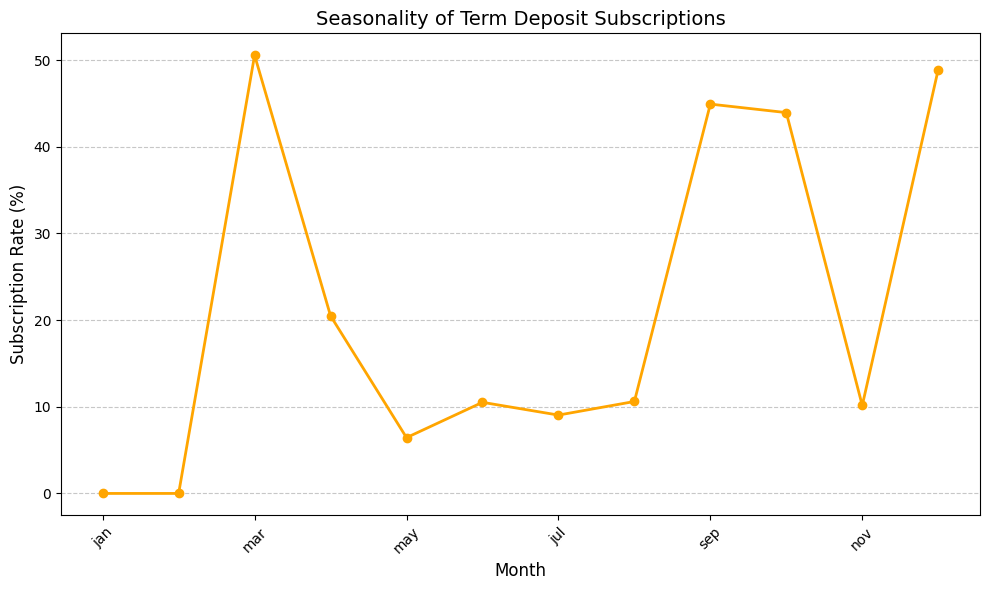

In [24]:
# Plot the seasonality pattern
plt.figure(figsize=(10, 6))
monthly_subscription.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Seasonality of Term Deposit Subscriptions', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights**
1. **Peak Months**: Subscription rates are highest in March and December, indicating seasonal spikes.  
2. **Low Activity Period**: The lowest subscription rates occur in the  mid-year, July.  there were no data for january and february.
3. **Consistent Trends**: Moderate activity is observed in September and November, suggesting potential opportunities for targeted campaigns during these periods.

In [25]:
# Filter individuals with less contact (previous = 0 and pdays = 999). To ensure that we only consider individuals who fit the "less contacted" criteria based on both pdays and previous. 
less_contacted = training_data[(training_data['previous'] == 0) & (training_data['pdays'] == 999)]

# Calculate subscription rates for each contact method
subscription_rates = less_contacted.groupby('contact')['y'].value_counts(normalize=True).unstack()['yes'] * 100

# Display the results
print(subscription_rates)


contact
cellular     11.729546
telephone     4.693264
Name: yes, dtype: float64


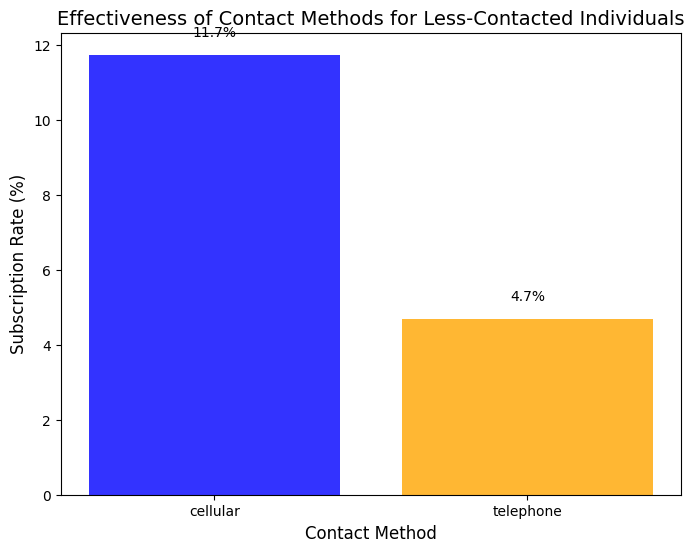

In [26]:
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(subscription_rates.index, subscription_rates.values, color=['blue', 'orange'], alpha=0.8)

# Add titles and labels
plt.title('Effectiveness of Contact Methods for Less-Contacted Individuals', fontsize=14)
plt.xlabel('Contact Method', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)

# Show values on top of the bars
for i, v in enumerate(subscription_rates.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

# Display the plot
plt.show()

**Insights** 

This bar chart compares the effectiveness of two contact methods—**cellular** and **telephone**—in converting less-contacted individuals into customers. 

- The **cellular** method has a significantly higher subscription rate of **11.7%**, compared to the **telephone** method, which has a rate of **4.7%**. 
- This suggests that **cellular communication** is more effective in persuading individuals who have been contacted less frequently (i.e., `previous = 0` and `pdays = 999`) to subscribe.

poutcome
failure        14.228598
nonexistent     8.832382
success        65.112891
Name: yes, dtype: float64


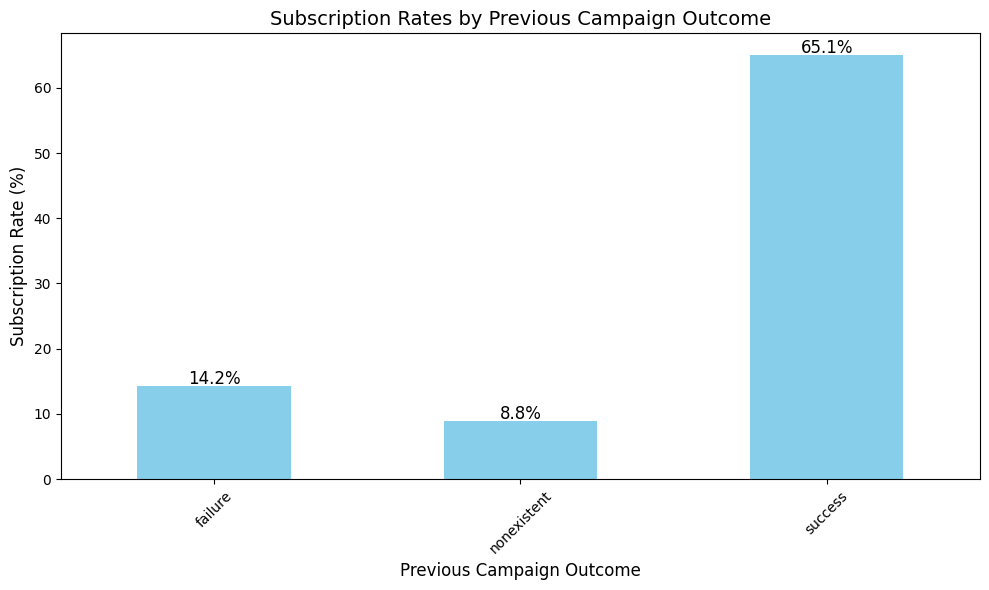

In [27]:
# Group by 'poutcome' and calculate the subscription rate for each group
poutcome_sub_rates = training_data.groupby('poutcome')['y'].value_counts(normalize=True).unstack()['yes'] * 100

# Display the subscription rates by previous campaign outcome
print(poutcome_sub_rates)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = poutcome_sub_rates.plot(kind='bar', color='skyblue')

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Subscription Rates by Previous Campaign Outcome', fontsize=14)
plt.xlabel('Previous Campaign Outcome', fontsize=12)
plt.ylabel('Subscription Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights**
The success rates from the previous campaign is ranging from 60-70%, which suggests that past campaign success has a strong correlation with higher subscription rates in the current campaign
Hence,**targeting individuals with a positive previous campaign outcome may be more effective**

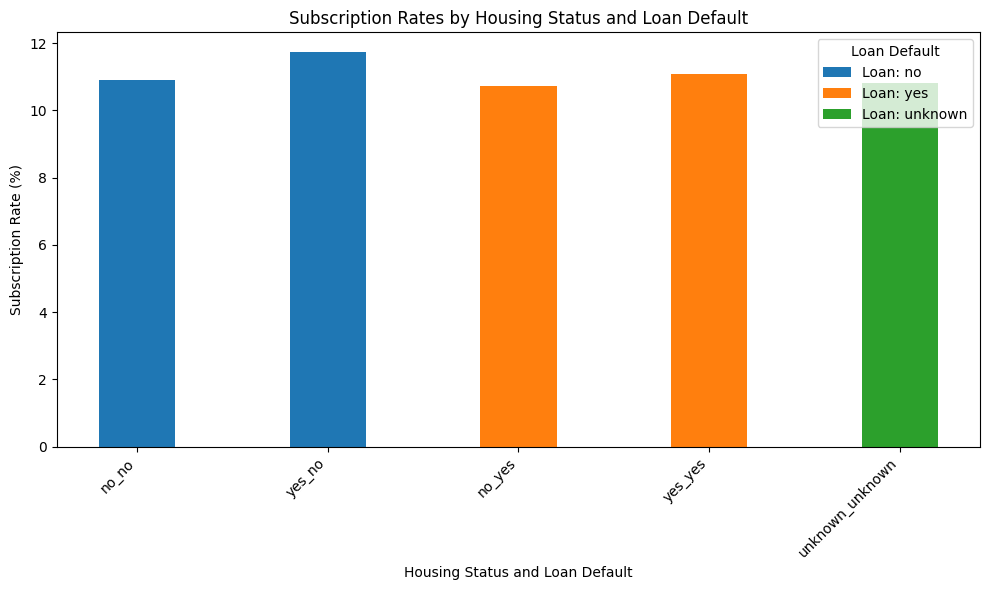

In [28]:
# Group by 'housing' and 'loan' and calculate subscription rates
subscription_rate = training_data.groupby(['housing', 'loan'])['y'].value_counts(normalize=True).unstack()['yes'] * 100

# Reset the index to use for plotting
subscription_rate = subscription_rate.reset_index()

# Plotting a clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each 'loan' status (using different colors)
for loan_status in subscription_rate['loan'].unique():
    data_to_plot = subscription_rate[subscription_rate['loan'] == loan_status]
    ax.bar(data_to_plot['housing'] + f'_{loan_status}', data_to_plot['yes'], label=f'Loan: {loan_status}', width=0.4)

# Add labels and title
ax.set_title('Subscription Rates by Housing Status and Loan Default')
ax.set_xlabel('Housing Status and Loan Default')
ax.set_ylabel('Subscription Rate (%)')

# Add legend
ax.legend(title='Loan Default')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


**Key Observations:**

For customers with "no housing" (likely renting), the subscription rate is low, particularly for those with loan defaults.
For customers with "yes housing", the subscription rate is much higher, with loan default status having less of an impact. This indicates that homeownership may be a stronger predictor of subscription likelihood compared to loan default status.
The overall trend suggests that financial stability and homeownership are key factors in customer subscription behavior. Customers with stable housing and no loan defaults are the most likely to subscribe.

In conclusion,
**Homeownership significantly boosts the likelihood of subscription, while loan defaults tend to lower it.**
**Strategies targeting homeowners, especially those without loan defaults, could yield higher subscription rates**


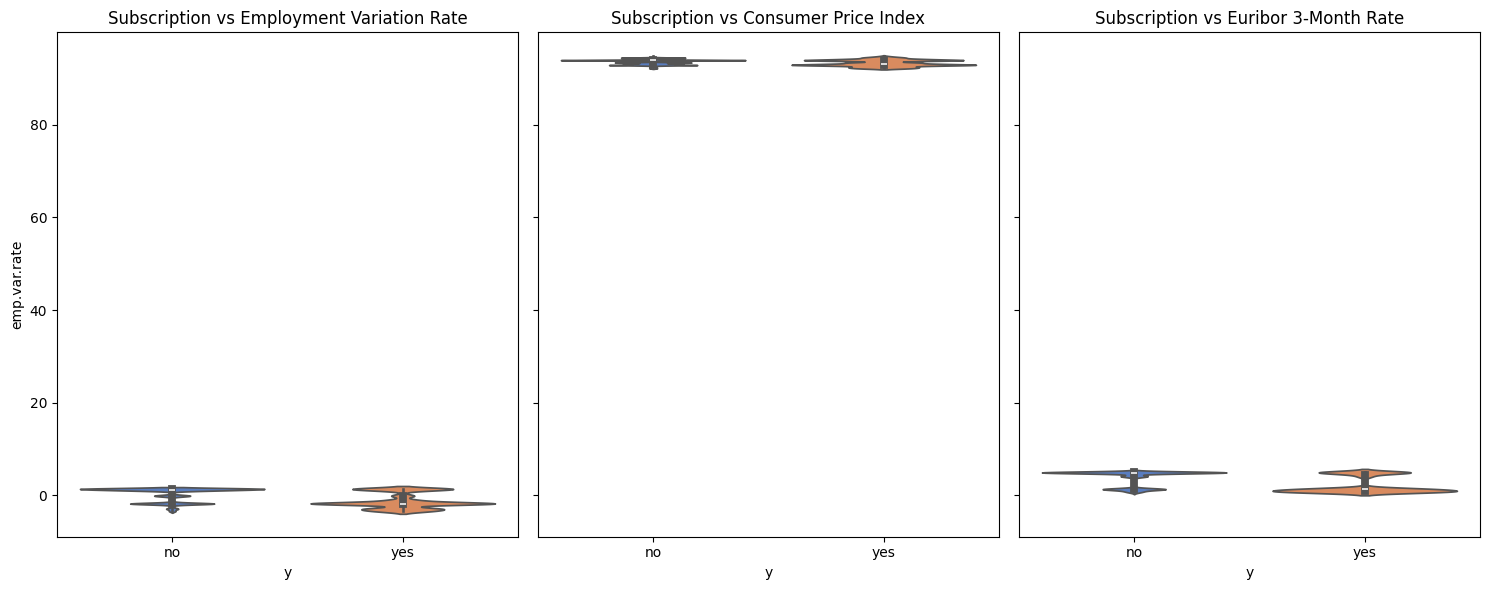

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Violin plot for employment variation rate
sns.violinplot(data=training_data, x='y', y='emp.var.rate', ax=axes[0], palette='muted')
axes[0].set_title('Subscription vs Employment Variation Rate')

# Violin plot for consumer price index
sns.violinplot(data=training_data, x='y', y='cons.price.idx', ax=axes[1], palette='muted')
axes[1].set_title('Subscription vs Consumer Price Index')

# Violin plot for euribor 3-month rate
sns.violinplot(data=training_data, x='y', y='euribor3m', ax=axes[2], palette='muted')
axes[2].set_title('Subscription vs Euribor 3-Month Rate')

plt.tight_layout()
plt.show()


**Insights**
Economic Indicators Have Minimal Differentiation: Since key economic indicators (like emp.var.rate, cons.price.idx, and euribor3m) show little variation between subscribers and non-subscribers, tailoring campaigns based solely on these indicators may not significantly impact conversion rates.

### Modelling and Evaluation 

In [30]:
training_data.drop(columns=['age_group'], inplace=True)

In [31]:
training_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
print(training_data.dtypes)


age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month             category
day_of_week         object
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object


In [33]:
training_data.dropna(inplace=True)

In [34]:
training_data['age'].unique().sum()

np.int64(4339)

In [35]:
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numeric_cols:
    if col in training_data.columns:
        print(f"{col}: {pd.to_numeric(training_data[col], errors='coerce').isnull().sum()} non-numeric values")
    else:
        print(f"{col} column is missing from the DataFrame.")


age: 0 non-numeric values
campaign: 0 non-numeric values
pdays: 0 non-numeric values
previous: 0 non-numeric values
emp.var.rate: 0 non-numeric values
cons.price.idx: 0 non-numeric values
cons.conf.idx: 0 non-numeric values
euribor3m: 0 non-numeric values
nr.employed: 0 non-numeric values


In [36]:
training_data.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month             category
day_of_week         object
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object

In [37]:
categorical_cols = training_data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns to encode:", categorical_cols)


Categorical columns to encode: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [38]:
training_data_encoded = pd.get_dummies(training_data, columns=categorical_cols, drop_first=True)
print("Data after encoding:")
print(training_data_encoded.head())


Data after encoding:
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_oct  \
0          -36.4      4.857       5191.0            False  ...      False   
1          -36.4      4.857       5191.0            False  ...      False   
2          -36.4      4.857       5191.0            False  ...      False   
3          -36.4      4.857       5191.0            False  ...      False   
4          -36.4      4.857       5191.0            False  ...      False   

   month_nov  month_dec  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False            

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    training_data[col] = label_encoder.fit_transform(training_data[col])
print("Data after label encoding:")
print(training_data.head())


Data after label encoding:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          1        1        0     0        1      6   
2   37    7        1          1        0        2     0        1      6   
3   40    0        1          0        0        0     0        1      6   
4   56    7        1          1        0        0     2        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1    999         0         1           1.1   
1            1         1    999         0         1           1.1   
2            1         1    999         0         1           1.1   
3            1         1    999         0         1           1.1   
4            1         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857  

In [40]:
X = training_data.drop(columns=['y'])  # Features
y = training_data['y']  # Target


In [41]:
# 1. Scaling numeric columns
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
numeric_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [42]:
# Apply scaling
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [43]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Stratified split to preserve class distribution


In [44]:
# Balance the data using SMOTE (or use RandomOverSampler for simpler balancing)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [45]:
# Check the new class distribution after SMOTE
print("Training set class distribution after SMOTE:", y_train_res.value_counts())

Training set class distribution after SMOTE: y
0    29229
1    29229
Name: count, dtype: int64


1. Model 1 : Logistic Regression

In [46]:
# 1. Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model on the balanced training data
log_reg.fit(X_train_res, y_train_res)

# 3. Predict on the test set
y_pred = log_reg.predict(X_test)

In [47]:
# 4. Evaluate the model
print("Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score on Test Set: 0.7926177756192326

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      7308
           1       0.30      0.64      0.41       928

    accuracy                           0.79      8236
   macro avg       0.62      0.72      0.64      8236
weighted avg       0.87      0.79      0.82      8236


Confusion Matrix:
 [[5938 1370]
 [ 338  590]]


Key Takeaway Report
The model performs well for the no subscription class but has much lower performance for the subscription class. This indicates that there might be some imbalance in the data distribution, despite the use of SMOTE.

In [48]:
# 5. Cross-validation score (to check generalization)
cv_scores = cross_val_score(log_reg, X_train_res, y_train_res, cv=5)
print("\nCross-validation scores (5-fold):", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores (5-fold): [0.72083476 0.75188163 0.75290797 0.75194594 0.75468309]
Mean CV score: 0.7464506778828409


**Cross-validation Score:**

The cross-validation scores across 5 folds range from 0.72 to 0.75, with a mean score of 0.75. This indicates that the model is reasonably stable across different subsets of the data.

Model 2: Random Forest

In [49]:
# 4. Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 5. Train the model
rf_model.fit(X_train_res, y_train_res)

# 6. Predict on the test set
y_pred = rf_model.predict(X_test)

In [50]:
# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy Score: 0.8814958717824186

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7308
           1       0.47      0.40      0.43       928

    accuracy                           0.88      8236
   macro avg       0.70      0.67      0.68      8236
weighted avg       0.87      0.88      0.88      8236


Confusion Matrix:
 [[6893  415]
 [ 561  367]]


Model 3: K-NearestNeighbors

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn_model.fit(X_train_res, y_train_res)

# Predict and evaluate the KNN model
knn_y_pred = knn_model.predict(X_test)

# KNN accuracy and report
print("KNN Model:")
print(f"Accuracy Score: {accuracy_score(y_test, knn_y_pred)}")
print("Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))

KNN Model:
Accuracy Score: 0.7498785818358427
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7308
           1       0.24      0.58      0.34       928

    accuracy                           0.75      8236
   macro avg       0.59      0.67      0.59      8236
weighted avg       0.86      0.75      0.79      8236

Confusion Matrix:
[[5640 1668]
 [ 392  536]]


Model 4 : Decision Tree 

In [52]:
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)  # Applying class weight adjustment
dt_model.fit(X_train, y_train)

# Predict and evaluate the Decision Tree model
dt_y_pred = dt_model.predict(X_test)

# Decision Tree accuracy and report
print("Decision Tree Model:")
print(f"Accuracy Score: {accuracy_score(y_test, dt_y_pred)}")
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

Decision Tree Model:
Accuracy Score: 0.8457989315201554
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7308
           1       0.32      0.34      0.33       928

    accuracy                           0.85      8236
   macro avg       0.62      0.62      0.62      8236
weighted avg       0.85      0.85      0.85      8236

Confusion Matrix:
[[6651  657]
 [ 613  315]]


In [53]:
# Cross validation for both models
# KNN cross-validation
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5)
print(f"KNN Cross-validation scores (5-fold): {knn_cv_scores}")
print(f"KNN Mean CV score: {knn_cv_scores.mean()}")

# Decision Tree cross-validation
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"Decision Tree Cross-validation scores (5-fold): {dt_cv_scores}")
print(f"Decision Tree Mean CV score: {dt_cv_scores.mean()}")

KNN Cross-validation scores (5-fold): [0.88586693 0.62282939 0.78846387 0.2774742  0.39550698]
KNN Mean CV score: 0.5940282728129765
Decision Tree Cross-validation scores (5-fold): [0.88744536 0.16672738 0.2295082  0.10200364 0.13770492]
Decision Tree Mean CV score: 0.3046779005376606


Tuning Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC-AUC score for Logistic Regression: 0.7835549742037143
Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV ROC-AUC score for Random Forest: 0.8009566915809799
Tuning Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV ROC-AUC score for Decision Tree: 0.7447785397035204
Tuning KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best CV ROC-AUC score for KNN: 0.749892785747590

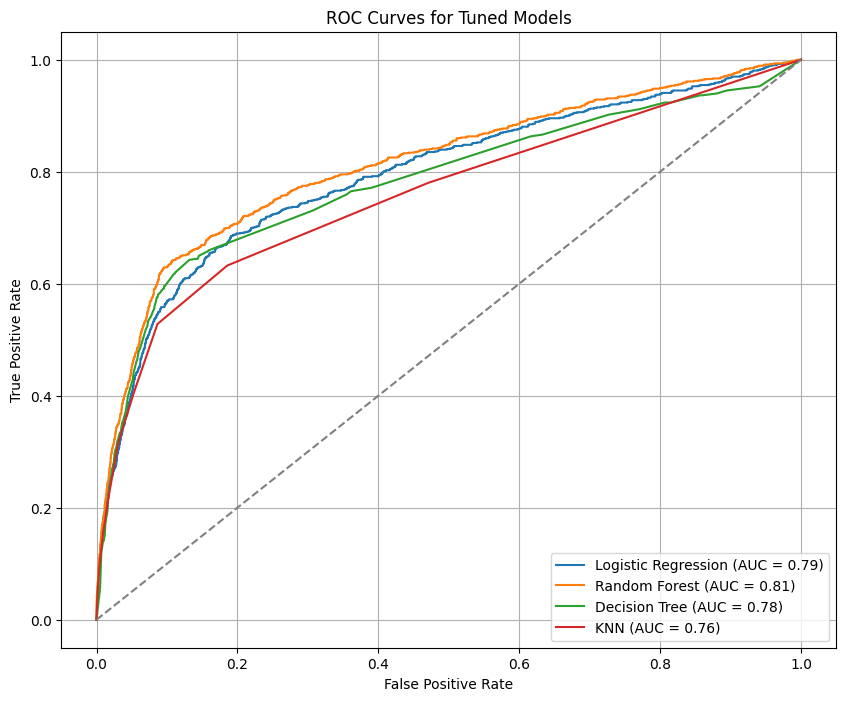

The best performing model is Random Forest with the highest ROC-AUC score.


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier()
}

# Tune hyperparameters using GridSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best CV ROC-AUC score for {model_name}: {grid_search.best_score_}")

# Generate ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Tuned Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Display best performing model based on AUC
best_model_name = max(best_models, key=lambda name: auc(*roc_curve(y_test, best_models[name].predict_proba(X_test)[:, 1])[:2]))
print(f"The best performing model is {best_model_name} with the highest ROC-AUC score.")
